In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn.functional import adaptive_avg_pool2d
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from ae.distributions import rand_cirlce2d, rand_ring2d, rand_uniform2d
from ae.models.mnist import MNISTAutoencoder
from torchvision.utils import save_image
import torchvision.utils as vutils
from ae.trainer_swae import _sliced_wasserstein_distance


torch.manual_seed(17)
device = 'cpu'

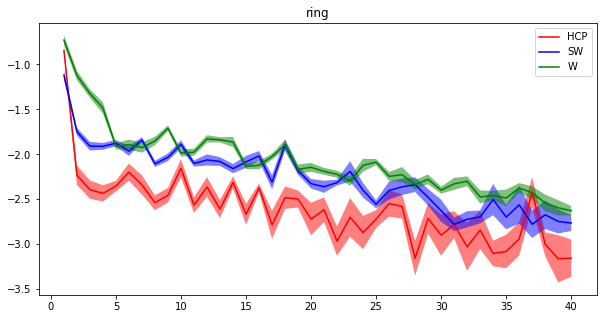

In [3]:
losshp = np.load('hcp_loss.npy')
losssw = np.load('sw_loss.npy')
lossw = np.load('w_loss.npy')

losshpv = np.load('hcp_lossv.npy')
lossswv = np.load('sw_lossv.npy')
losswv = np.load('w_lossv.npy')


plt.figure(figsize=(10,5))
plt.plot(np.arange(1,41),losshp,c='r',label='HCP')
plt.fill_between(np.arange(1,41), losshp+losshpv, losshp-losshpv, facecolor='r', alpha=0.5)
plt.plot(np.arange(1,41),losssw,c='b',label='SW')
plt.fill_between(np.arange(1,41), losssw+lossswv, losssw-lossswv, facecolor='b', alpha=0.5)
plt.plot(np.arange(1,41),lossw,c='g',label='W')
plt.fill_between(np.arange(1,41), lossw+losswv, lossw-losswv, facecolor='g', alpha=0.5)

plt.title('ring')
plt.legend()